# WEEK 3 ASSIGNMENT
EDA on Open Dataset: Select a public dataset (e.g., COVID-19 or Sales Data). Conduct data cleaning, create visualizations for trends, correlations, and outliers, and derive three actionable insights. Explain how each visualization helps a stakeholder understand key metrics. Submit code, graphs, and a one-page insight summary.

This cell imports the required Python libraries for data analysis and visualization.
Pandas and NumPy are used for data handling, while Matplotlib and Seaborn are used to create EDA visualizations.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


This code loads the sales dataset into a Pandas DataFrame.
The head() function is used to preview the first few rows of the dataset.

In [39]:

df = pd.read_csv("/content/sales_data (1).csv")
df.head()


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


This cell provides an overview of the dataset including size, column names, data types, and basic statistics.
It helps in understanding the structure and distribution of the data.

In [40]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


It checks for missing values in the dataset and removes them.
Handling missing data ensures accurate and reliable analysis.

In [41]:
df.isnull().sum()
df = df.dropna()


It drops the duplicate records from the dataset.
Removing duplicates avoids biased results in EDA.

In [42]:
df = df.drop_duplicates()


converts the Sale_Date column into datetime format.
Datetime conversion allows time-based analysis such as monthly and yearly trends.

In [43]:
df["Sale_Date"] = pd.to_datetime(df["Sale_Date"])


It contains new columns: Month, Year, and Profit.
These features support trend analysis and profitability evaluation.

In [44]:
df["Sale_Date"] = pd.to_datetime(df["Sale_Date"])
df["Month"] = df["Sale_Date"].dt.month
df["Year"] = df["Sale_Date"].dt.year


In [45]:
df.columns


Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep', 'Month', 'Year'],
      dtype='object')

In [46]:
df["Month"] = df["Sale_Date"].dt.month
df["Year"] = df["Sale_Date"].dt.year
df["Profit"] = (df["Unit_Price"] - df["Unit_Cost"]) * df["Quantity_Sold"]


It visualize the groups of sales data by month and plots a line graph.
The visualization helps stakeholders identify sales trends and seasonal patterns

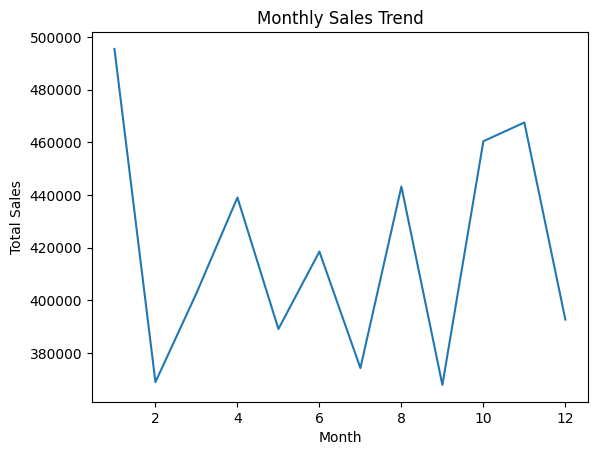

In [47]:
monthly_sales = df.groupby("Month")["Sales_Amount"].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


It calculates correlations between numerical variables and visualizes them using a heatmap.
It helps identify relationships that impact sales and profit.

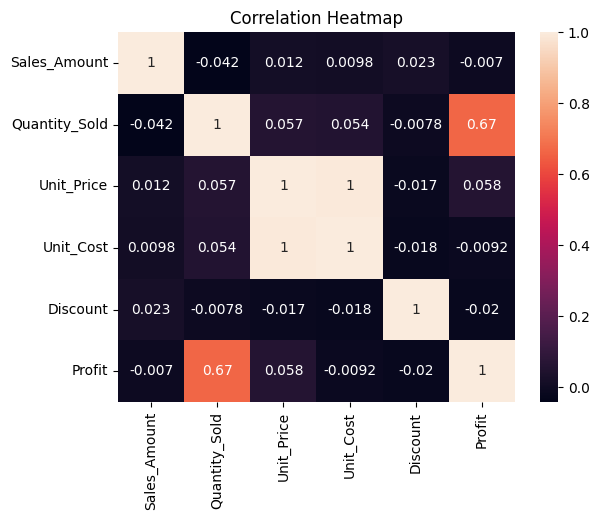

In [48]:
plt.figure()
sns.heatmap(
    df[["Sales_Amount","Quantity_Sold","Unit_Price","Unit_Cost","Discount","Profit"]].corr(),
    annot=True
)
plt.title("Correlation Heatmap")
plt.show()


This code uses a boxplot to detect outliers in Sales Amount.
Outliers represent unusually high or low sales transactions.

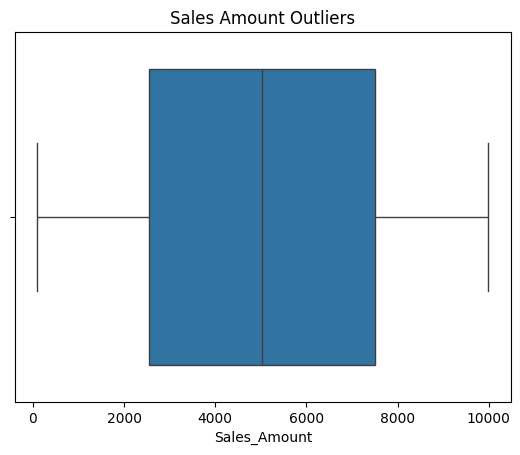

In [49]:
plt.figure()
sns.boxplot(x=df["Sales_Amount"])
plt.title("Sales Amount Outliers")
plt.show()


It aggregates sales by product category and displays them using a bar chart.
It helps compare performance across different product categories.

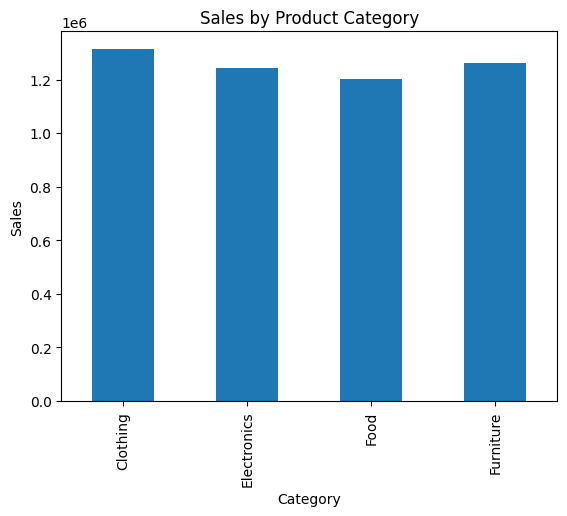

In [50]:
category_sales = df.groupby("Product_Category")["Sales_Amount"].sum()

plt.figure()
category_sales.plot(kind="bar")
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()


# Resources Used:
Python, Pandas, NumPy, Matplotlib, Seaborn, Google Colab

# **INSIGHTS**
1: Sales show seasonal variation across months.
Action: Plan inventory and promotions based on peak months.

2: Profit is strongly related to quantity sold.
Action: Encourage bulk purchases instead of heavy discounts.

3: High-value sales outliers exist.
Action: Create special offers or loyalty programs for premium customers.